# Example of the `aitlas` toolbox in the context of image segmentation

This notebook shows a sample implementation of a image segmentation using the `aitlas` toolbox.

## Import the required packages

In [ ]:
from aitlas.datasets import ChactunDataset
from aitlas.models import DeepLabV3
from aitlas.transforms import MinMaxNormTranspose
from aitlas.utils import image_loader

## Visualize images and masks

Total number of patches: 1764


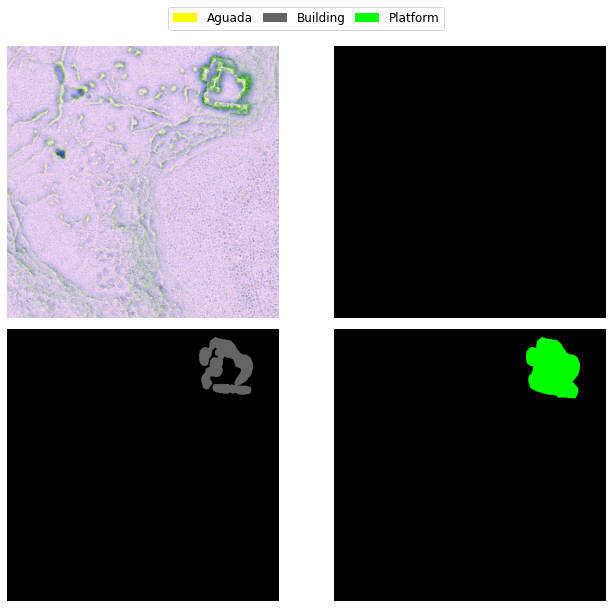

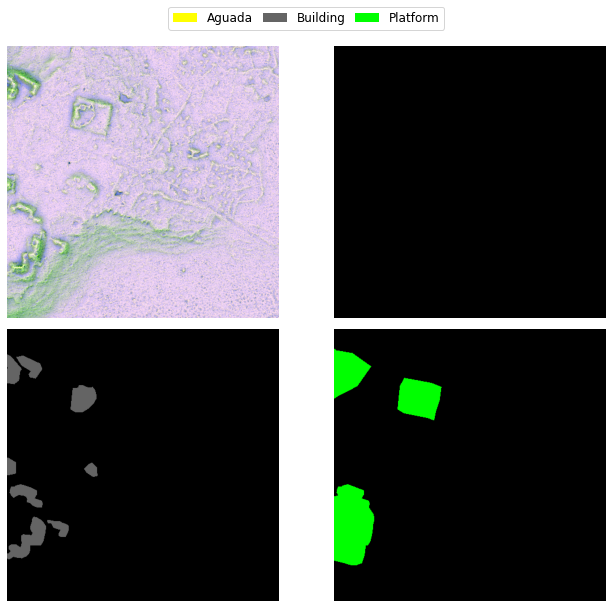

In [2]:
dataset_config = {
    "data_dir": "../data/chactun/train"
}
dataset = ChactunDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(897);
dataset.show_image(10);

In [6]:
dataset.data_distribution_table()

,Number of pixels
Aguada,1357783.0
Building,6904853.0
Platform,8656330.0


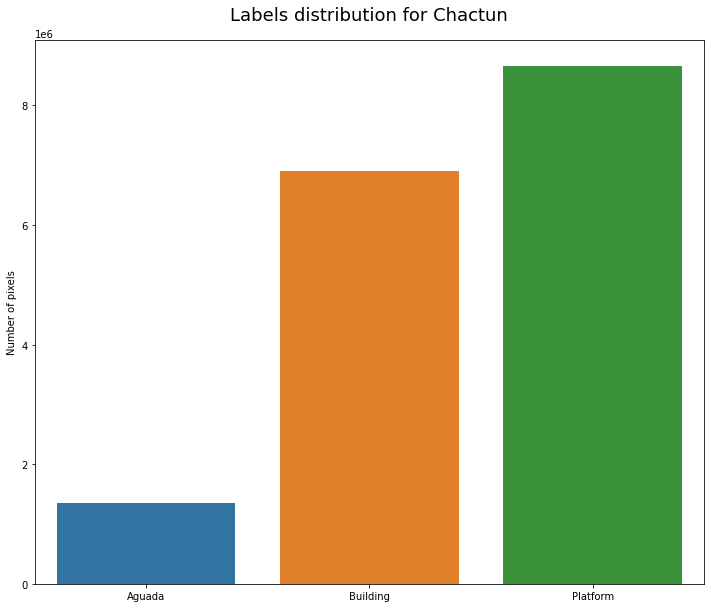

In [7]:
dataset.data_distribution_barchart();

## Load train data

In [3]:
train_dataset_config = {
    "batch_size": 16,
    "shuffle": True,
    "data_dir": "../data/chactun/train",
    "joint_transforms": ["aitlas.transforms.FlipHVRandomRotate"],
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}
train_dataset = ChactunDataset(train_dataset_config)
len(train_dataset)

1764

## Create the model

In [4]:
epochs = 50
model_directory = "./experiments/chactun"
model_config = {
    "num_classes": 3, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training

In [5]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
)

2022-10-31 10:45:10,709 INFO Starting training.
training: 100%|███████████████████████████████████████████████████████████████████████| 111/111 [01:08<00:00,  1.62it/s]
2022-10-31 10:46:19,364 INFO epoch: 1, time: 69, loss:  0.45119
testing on train set: 100%|███████████████████████████████████████████████████████████| 111/111 [00:22<00:00,  5.01it/s]
2022-10-31 10:46:42,743 INFO IOU:0.40835557092993935, IOU mean:0.3016339483859447, IOU per Class:[3.02641793e-04 4.67605943e-01 4.36993260e-01]
training: 100%|███████████████████████████████████████████████████████████████████████| 111/111 [01:08<00:00,  1.62it/s]
2022-10-31 10:47:51,451 INFO epoch: 2, time: 69, loss:  0.25232
testing on train set: 100%|███████████████████████████████████████████████████████████| 111/111 [00:22<00:00,  5.03it/s]
2022-10-31 10:48:13,534 INFO IOU:0.5171901108377664, IOU mean:0.37320808040054515, IOU per Class:[0.         0.60727203 0.51235222]
training: 100%|█████████████████████████████████████████████████

testing on train set: 100%|███████████████████████████████████████████████████████████| 111/111 [00:22<00:00,  4.97it/s]
2022-10-31 11:26:09,289 INFO IOU:0.6992841103227071, IOU mean:0.703564785203939, IOU per Class:[0.71387103 0.70056648 0.69625684]
training: 100%|███████████████████████████████████████████████████████████████████████| 111/111 [01:08<00:00,  1.61it/s]
2022-10-31 11:27:18,069 INFO epoch: 28, time: 69, loss:  0.01485
testing on train set: 100%|███████████████████████████████████████████████████████████| 111/111 [00:22<00:00,  4.98it/s]
2022-10-31 11:27:40,387 INFO IOU:0.6860931558817487, IOU mean:0.6668287905781058, IOU per Class:[0.61047222 0.70919782 0.68081633]
training: 100%|███████████████████████████████████████████████████████████████████████| 111/111 [01:08<00:00,  1.61it/s]
2022-10-31 11:28:49,367 INFO epoch: 29, time: 69, loss:  0.01460
testing on train set: 100%|███████████████████████████████████████████████████████████| 111/111 [00:22<00:00,  4.97it/s]
2022

training: 100%|███████████████████████████████████████████████████████████████████████| 111/111 [01:08<00:00,  1.61it/s]
2022-10-31 11:47:03,335 INFO epoch: 41, time: 69, loss:  0.01170
testing on train set: 100%|███████████████████████████████████████████████████████████| 111/111 [00:22<00:00,  4.99it/s]
2022-10-31 11:47:27,045 INFO IOU:0.7258626214547689, IOU mean:0.7396397196803592, IOU per Class:[0.77341182 0.73043347 0.71507387]
training: 100%|███████████████████████████████████████████████████████████████████████| 111/111 [01:08<00:00,  1.62it/s]
2022-10-31 11:48:35,649 INFO epoch: 42, time: 68, loss:  0.01184
testing on train set: 100%|███████████████████████████████████████████████████████████| 111/111 [00:21<00:00,  5.05it/s]
2022-10-31 11:48:57,647 INFO IOU:0.7276940024472216, IOU mean:0.7115273631642426, IOU per Class:[0.67160737 0.72726349 0.73571122]
training: 100%|███████████████████████████████████████████████████████████████████████| 111/111 [01:08<00:00,  1.62it/s]
202

0.010716325564356415

## Evalute the model using test data

In [8]:
test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "../data/chactun/test",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}

test_dataset = ChactunDataset(test_dataset_config)
len(test_dataset)

model = DeepLabV3(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "./experiments/chactun/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

2022-10-31 12:09:18,030 INFO Loading checkpoint ./experiments/chactun/checkpoint.pth.tar
2022-10-31 12:09:18,701 INFO Loaded checkpoint ./experiments/chactun/checkpoint.pth.tar at epoch 51
testing on test set: 100%|██████████████████████████████████████████████████████████████| 83/83 [00:05<00:00, 16.38it/s]


[{'IOU': 0.6857654440778834,
  'IOU mean': 0.6929769617711603,
  'IOU per Class': array([0.70656233, 0.69576405, 0.67660451])}]

## Predictions

2022-10-31 12:10:13,006 INFO Loading checkpoint ./experiments/chactun/checkpoint.pth.tar
2022-10-31 12:10:13,557 INFO Loaded checkpoint ./experiments/chactun/checkpoint.pth.tar at epoch 51


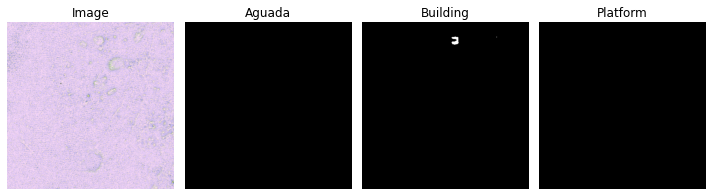

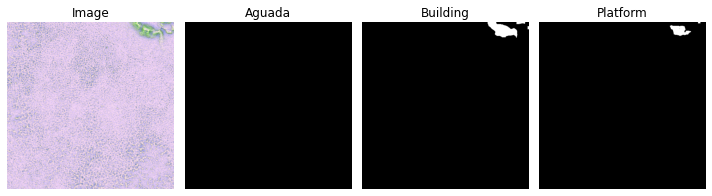

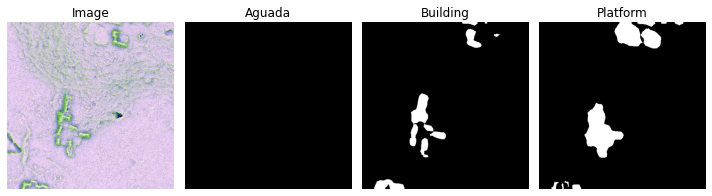

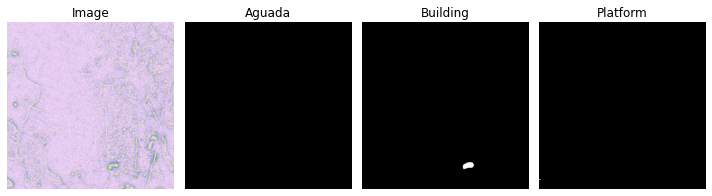

In [10]:
model_path = "./experiments/chactun/checkpoint.pth.tar"
#labels = ChactunDataset.labels
labels = ["Aguada", "Building", "Platform"]
transform = MinMaxNormTranspose()
model.load_model(model_path)

image = image_loader('../data/chactun/predict/tile_1741_lidar.tif')
fig = model.predict_masks(image, labels, transform)

image = image_loader('../data/chactun/predict/tile_1763_lidar.tif')
fig = model.predict_masks(image, labels, transform)

image = image_loader('../data/chactun/predict/tile_1730_lidar.tif')
fig = model.predict_masks(image, labels, transform)

image = image_loader('../data/chactun/predict/tile_1724_lidar.tif')
fig = model.predict_masks(image, labels, transform)